<a id="intro"></a>
<div style="background-color:#7E60BF; padding:10px; border-radius:8px; color:white; text-align:center; font-weight:bold; margin:0;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;"></span>  Recipe Recommendation System
</div>


In [2]:
# import the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# read the data
df = pd.read_csv('Dataset/Recipe_data.csv')

In [4]:
# check the first 5 rows of the data
df.head()

,Unnamed: 0,recipe_id,recipe_name,aver_rate,image_url,review_nums,calories,fat,carbohydrates,protein,cholesterol,sodium,fiber,ingredients_list
0,0,222388,Homemade Bacon,5.00,https://images.media-allrecipes.com/userphotos...,3,15,36,1,42,21,81,2,"['pork belly', 'smoked paprika', 'kosher salt'..."
1,1,240488,"Pork Loin, Apples, and Sauerkraut",4.76,https://images.media-allrecipes.com/userphotos...,29,19,18,10,73,33,104,41,"['sauerkraut drained', 'Granny Smith apples sl..."
2,2,218939,Foolproof Rosemary Chicken Wings,4.57,https://images.media-allrecipes.com/userphotos...,12,17,36,2,48,24,31,4,"['chicken wings', 'sprigs rosemary', 'head gar..."
3,3,87211,Chicken Pesto Paninis,4.62,https://images.media-allrecipes.com/userphotos...,163,32,45,20,65,20,43,18,"['focaccia bread quartered', 'prepared basil p..."
4,4,245714,Potato Bacon Pizza,4.50,https://images.media-allrecipes.com/userphotos...,2,8,12,5,14,7,8,3,"['red potatoes', 'strips bacon', 'Sauce:', 'he..."


In [5]:
# check the shape of the data
df.shape

(48735, 14)

In [6]:
# check the columns of the data
df.columns

Index(['Unnamed: 0', 'recipe_id', 'recipe_name', 'aver_rate', 'image_url',
       'review_nums', 'calories', 'fat', 'carbohydrates', 'protein',
       'cholesterol', 'sodium', 'fiber', 'ingredients_list'],
      dtype='object')

In [7]:
# check the info of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48735 entries, 0 to 48734
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        48735 non-null  int64  
 1   recipe_id         48735 non-null  int64  
 2   recipe_name       48735 non-null  object 
 3   aver_rate         48735 non-null  float64
 4   image_url         48735 non-null  object 
 5   review_nums       48735 non-null  int64  
 6   calories          48735 non-null  int64  
 7   fat               48735 non-null  int64  
 8   carbohydrates     48735 non-null  int64  
 9   protein           48735 non-null  int64  
 10  cholesterol       48735 non-null  int64  
 11  sodium            48735 non-null  int64  
 12  fiber             48735 non-null  int64  
 13  ingredients_list  48735 non-null  object 
dtypes: float64(1), int64(10), object(3)
memory usage: 5.2+ MB


In [8]:
# Descriptive statistics
df.describe()

,Unnamed: 0,recipe_id,aver_rate,review_nums,calories,fat,carbohydrates,protein,cholesterol,sodium,fiber
count,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000
mean,24367.000000,131840.514579,4.311393,77.045696,16.422756,25.601149,10.152190,27.651934,19.949338,23.011224,11.038925
std,14068.727021,98524.853219,0.484486,284.401153,10.802746,22.605484,7.925232,29.107178,24.684108,50.872119,11.832147
min,0.000000,6663.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12183.500000,22181.500000,4.080000,6.000000,9.000000,10.000000,4.000000,7.000000,3.000000,6.000000,3.000000
50%,24367.000000,143114.000000,4.410000,18.000000,15.000000,20.000000,9.000000,16.000000,13.000000,14.000000,7.000000
75%,36550.500000,231980.500000,4.620000,54.000000,22.000000,35.000000,14.000000,43.000000,28.000000,30.000000,15.000000
max,48734.000000,262956.000000,5.000000,11191.000000,235.000000,591.000000,280.000000,920.000000,1344.000000,5285.000000,178.000000


In [11]:
# check the missing values
df.isnull().sum()

Unnamed: 0          0
recipe_id           0
recipe_name         0
aver_rate           0
image_url           0
review_nums         0
calories            0
fat                 0
carbohydrates       0
protein             0
cholesterol         0
sodium              0
fiber               0
ingredients_list    0
dtype: int64

In [13]:
# check the unique values in the data
df.nunique()

Unnamed: 0          48735
recipe_id           48735
recipe_name         48133
aver_rate             295
image_url           48735
review_nums          1318
calories              118
fat                   210
carbohydrates          86
protein               234
cholesterol           222
sodium                309
fiber                 124
ingredients_list    48624
dtype: int64

C:\Users\Sajjad Khan\AppData\Local\Temp\ipykernel_8464\3638593771.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['aver_rate'])


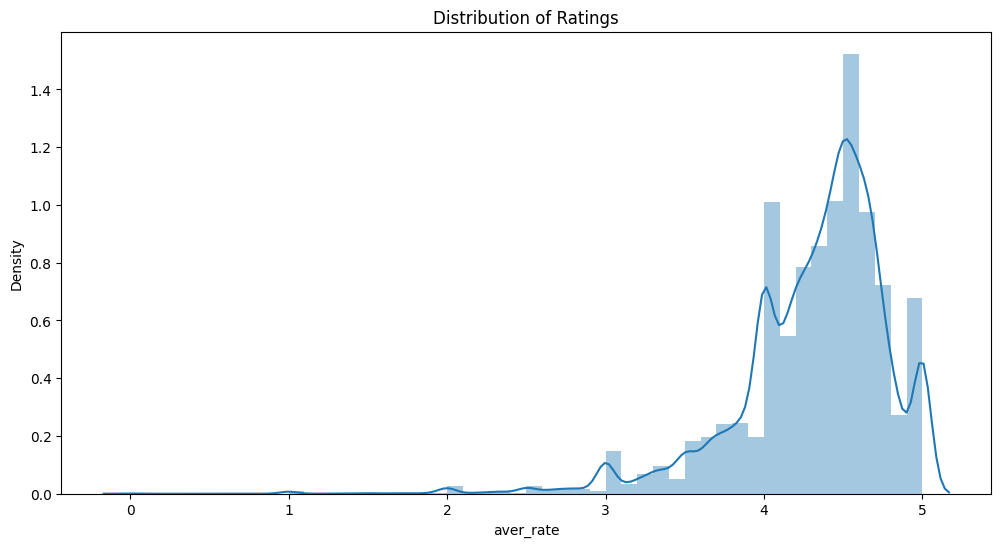

In [16]:
# plot the distribution of the data
plt.figure(figsize=(12, 6))
sns.distplot(df['aver_rate'])
plt.title('Distribution of Ratings')
plt.show()